### Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

try:
  from google.colab import drive
  drive.mount('/content/drive')

  COLAB = True
except ModuleNotFoundError:
  COLAB = False

# Download Data
To download the data you can go to [this link](https://drive.google.com/file/d/1NjvuEXyX65fQT7K4TFmxo1VGoJVNQwU4/view?usp=drive_link).

If using colab: upload the data to your own google-drive inside a folder called `predictive-analysis`.

# Data Gathering

TODO:
- [x] Create the sections (Bruno)
- [x] Create a structure to download from drive and create the pandas dataframe (Bruno)
- [x] Create a structure to load data in colab or locally in the same way, saving in a variable called `df` (Bruno)
- [x] Define a variable called `CAT_COLUMNS` with the categorical columns (Bruno)
- [x] Define a variable called `NUM_COLUMNS` with the numerical columns (Bruno)
- [x] Define a variable called `TGT` with the tgt column (Bruno)

In [2]:
if COLAB:
  df = pd.read_csv('/content/drive/MyDrive/predictive-analysis/diabetic_data.csv')
else:
  df = pd.read_csv("diabetic_data.csv")

df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [3]:
CAT_COLUMNS = [
  "encounter_id", "patient_nbr",
  "race", "gender", "age", "weight", "payer_code", "medical_specialty",
  "diag_1", "diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin",
  "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide",
  "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone",
  "acarbose", "miglitol", "troglitazone", "tolazamide",
  "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin",
  "glimepiride-pioglitazone", "metformin-rosiglitazone",
  "metformin-pioglitazone", "change", "diabetesMed", 
]
print(f"num of categorical columns: {len(CAT_COLUMNS)}")

num of categorical columns: 38


In [4]:
NUM_COLUMNS = [
  "admission_type_id", "discharge_disposition_id", "admission_source_id",
  "time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications",
  "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"
]
print(f"num of numerical columns: {len(NUM_COLUMNS)}")

num of numerical columns: 11


In [5]:
TGT = "readmitted"

# Data Cleaning

TODO:

- [x] Check the shape and the types of each column (Bruno)
- [x] Replace the "?" values for None (Bruno)
- [x] Check TGT columns (Bruno)
- [x] Remove categorical columns with only one value (Bruno)
- [x] Remove categorical columns with the number of values as the number of rows (Bruno)
- [x] Check for outliers in numerical columns (Bruno)


In [10]:
df.shape

(101766, 50)

In [11]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Replace all the "?" in the dataset for `None` values

In [6]:
df = df.replace("?", None)
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Tgt variable distribution

In [7]:
df[TGT].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [8]:
df[CAT_COLUMNS].nunique().sort_values()

citoglipton                      1
examide                          1
acetohexamide                    2
metformin-pioglitazone           2
metformin-rosiglitazone          2
glimepiride-pioglitazone         2
glipizide-metformin              2
troglitazone                     2
tolbutamide                      2
change                           2
diabetesMed                      2
gender                           3
tolazamide                       3
max_glu_serum                    4
glyburide-metformin              4
insulin                          4
miglitol                         4
rosiglitazone                    4
pioglitazone                     4
glyburide                        4
acarbose                         4
glimepiride                      4
A1Cresult                        4
chlorpropamide                   4
nateglinide                      4
glipizide                        4
repaglinide                      4
metformin                        4
race                

`encounter_id` has one value for each row, so we can remove it from the dataset

In [9]:
df = df.drop(columns=["encounter_id"], errors="ignore")
CAT_COLUMNS = [c for c in CAT_COLUMNS if c != "encounter_id"]

`citoglipton` and `examide` have only one value, so we can remove them from the dataset

In [10]:
df = df.drop(columns=["citoglipton", "examide"], errors="ignore")
CAT_COLUMNS = [c for c in CAT_COLUMNS if c not in ["citoglipton", "examide"]]

numerical columns

In [11]:
df[NUM_COLUMNS].describe().T

,count,mean,std,min,25%,50%,75%,max
admission_type_id,101766.0,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0


Finding outliers on the numerical - I suggest that we don't remove them right now, but later in our individual models

In [12]:
Q1 = df[NUM_COLUMNS].quantile(.25)
Q3 = df[NUM_COLUMNS].quantile(.75)
IQR = Q3 - Q1

outliers = (df[NUM_COLUMNS] < (Q1 - 1.5 * IQR)) | (df[NUM_COLUMNS] > (Q3 + 1.5 * IQR))

print("Number of outliers in each numerical column:")
outliers.sum()

Number of outliers in each numerical column:


admission_type_id             341
discharge_disposition_id     9818
admission_source_id          6956
time_in_hospital             2252
num_lab_procedures            143
num_procedures               4954
num_medications              2557
number_outpatient           16739
number_emergency            11383
number_inpatient             7049
number_diagnoses              281
dtype: int64

# EDA

TODO:

- [ ] Histogram visualisation of all the numeric columns
- [ ] Barplot visualisation of all the categorical columns
- [ ] Bivariate analysis of all numeric cols vs tgt - Boxplot plots
- [ ] Bivariate analysis of all numeric cols vs tgt - Anova analysis to get p-value
- [ ] Bivariate analysis of all categorical cols vs tgt - Mosaic / Stackbar / any other plot you like
- [ ] Bivariate analysis of all categorical cols vs tgt - chi-squared test
- [ ] Cluster Analysis to find any pattern within the data
- [X] Running PCA to understand what is the least amount of variables that we can explain the variance (Parsa)
- [X] Get the first two PCs and create a plot with them and get an interpration of it (Parsa)

In [24]:
x = df[NUM_COLUMNS]
x = StandardScaler().fit_transform(x)

In [22]:
x.shape

(101766, 11)

In [25]:
np.mean(x),np.std(x)

(1.8686700273870136e-17, 1.0)

In [25]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [26]:
normalised_numericals = pd.DataFrame(x,columns=feat_cols)

In [27]:
normalised_numericals.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,2.750800,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596
1,-0.708461,-0.514312,0.306482,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784
2,-0.708461,-0.514312,0.306482,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733
3,-0.708461,-0.514312,0.306482,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561
4,-0.708461,-0.514312,0.306482,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906


In [36]:
pca_readmit = PCA(n_components=11)
principalComponents_readmit = pca_readmit.fit_transform(x)

In [39]:
principal_readmit_df = pd.DataFrame(data = principalComponents_readmit[:,:2]
             , columns = ['principal component 1', 'principal component 2'])

In [40]:
principal_readmit_df.head()

,principal component 1,principal component 2
0,-2.473611,-1.989741
1,0.041641,0.352542
2,-0.763562,-0.316704
3,-0.715040,-0.151553
4,-1.861817,-0.047581


In [41]:
print('Explained variation per principal component: {}'.format(pca_readmit.explained_variance_ratio_))

Explained variation per principal component: [0.18746285 0.12986915 0.10957258 0.09981255 0.08888286 0.08577301
 0.0754504  0.06658379 0.05875353 0.0554621  0.04237719]


In [42]:
sum(pca_readmit.explained_variance_ratio_)

1.0

<Figure size 640x480 with 0 Axes>

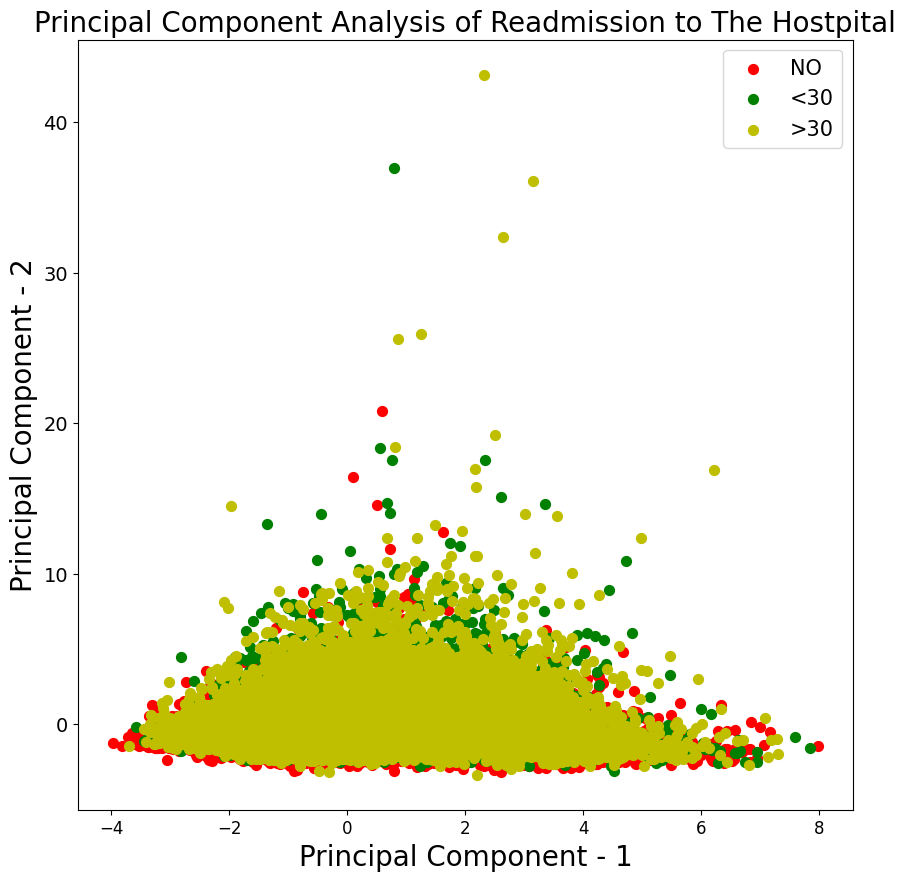

In [43]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Readmission to The Hostpital",fontsize=20)
targets = ['NO', '<30','>30']
colors = ['r', 'g','y']
for target, color in zip(targets,colors):
    indicesToKeep = df['readmitted'] == target
    plt.scatter(principal_readmit_df.loc[indicesToKeep, 'principal component 1']
               , principal_readmit_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
